**Data Set: Diabetes**

**Use Case: predict whether a person will have diabetes or not?**    

**diabets:** Diabetes is a chronic health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and is then released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.  
If you have diabetes, your body isn’t able to properly process and use glucose from the food you eat. There are different types of diabetes, each with different causes, but they all share the common problem of having too much glucose in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.  
Thus, the diagnosis of the disease at an early stage plays a very significant role as the early prediction of the disease will minimize the health risks associated with the disease.   

# Importing important libraries & reading the Dataset

In [2]:
# Importing important liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Other models for comparision
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense

#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/thenomaniqbal/Diabetes-prediction/master/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Explaining the data set

In [4]:
print("dimension of diabetes data: {}".format(data.shape))
print("n dimentions of diabetes data: {}".format(data.ndim))
print("size of diabetes data: {}".format(data.size))

dimension of diabetes data: (768, 9)
n dimentions of diabetes data: 2
size of diabetes data: 6912


We have a data set of 768 people who were or were not diagnosed with diabets.

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).  

The variables can be summarized as follows:

**Input Variables (X):**  

**Pregnancies**=Number of times pregnant  
**Glucose**=Plasma glucose concentration in plasma a 2 hours in an oral glucose tolerance test  
**BloodPressure**=Diastolic blood pressure (mm Hg)  
**SkinThickness**=Triceps skin fold thickness (mm)  
**Insulin**=2-Hour serum insulin (mu U/ml)  
**BMI**=Body mass index (weight in kg/(height in $(m)^2$)  
**DiabetesPedigreeFunction**=a function which scores likelihood of diabetes based on family history    
**Age**=Age (years)  

**Output Variables (y):**   

**Outcome**=Class variable (0 or 1)  


Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g. [rows, columns].

# Understanding the Data and statistical analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**“Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1.**

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**the dataset shows that it has no null values, so we have to use discriptive statistics to check if its right or not**

In [8]:
def describe(df):
    return pd.concat([df.describe().T, df.skew().rename('skew'),], axis=1)

describe(data)

,count,mean,std,min,25%,50%,75%,max,skew
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,0.901674
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,0.173754
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,-1.843608
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,0.109372
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,2.272251
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,-0.428982
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,1.919911
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,1.129597
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,0.635017


On these columns, a value of zero does not make sense and thus indicates missing value.Following columns or variables have an invalid zero value- Glucose, BloodPressure, SkinThickness, Insulin & BMI.  
**It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.**

**Furthermore, We can observe from the statistics that the maximum value of insulin is above 3 standard deviations that means there are more outliers in the insulin column so we will remove the data which is 2 standard deviations above.**

# Data Visualisation

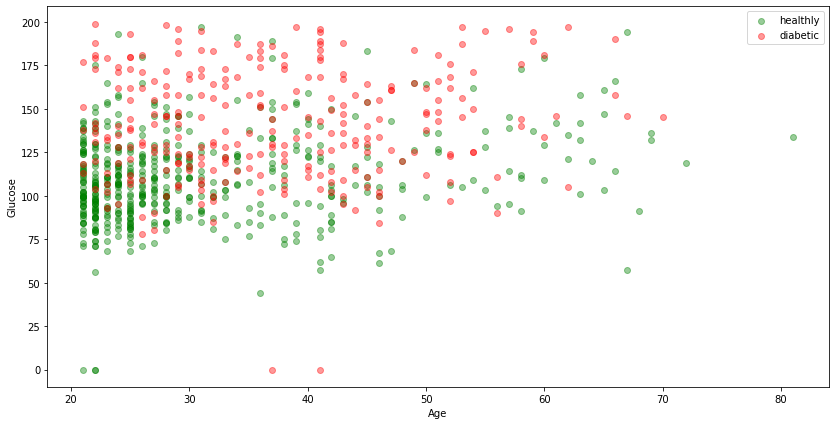

In [9]:
# comparing glucose with age
diabetics = data[data.Outcome == 1]
healthly = data[data.Outcome == 0]
plt.figure(figsize=(14,7))
# Make an example drawing by looking at gloucose:
# At the end of program, machine learning model will make a prediction by looking at all the other data, not just glucose.
plt.scatter(healthly.Age, healthly.Glucose, color="green", label="healthly", alpha = 0.4)
plt.scatter(diabetics.Age, diabetics.Glucose, color="red", label="diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

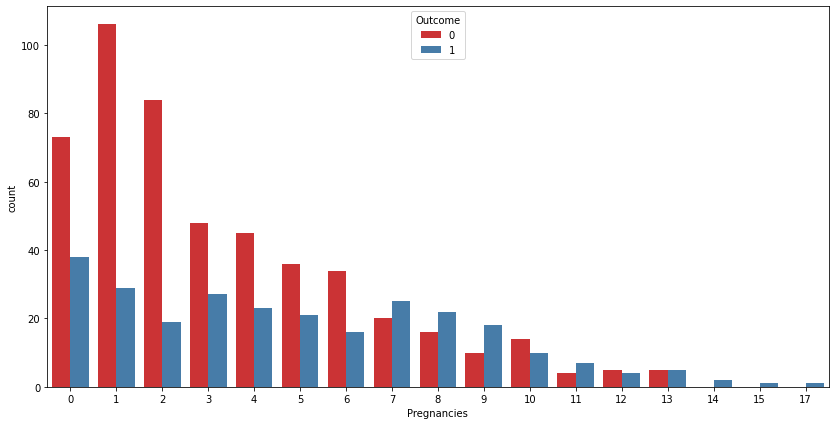

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(x='Pregnancies', hue='Outcome', data=data, palette='Set1')

We will observe here that even though there are more people with a low number of pregnancies, it can be assumed that people with a higher number of pregnancies are more likely to have diabetes. This is because not up to half of those with a low number of pregnancies (between 0–2) have diabetes. However, half or more than half of patients with over 3 number of pregnancies have diabetes.

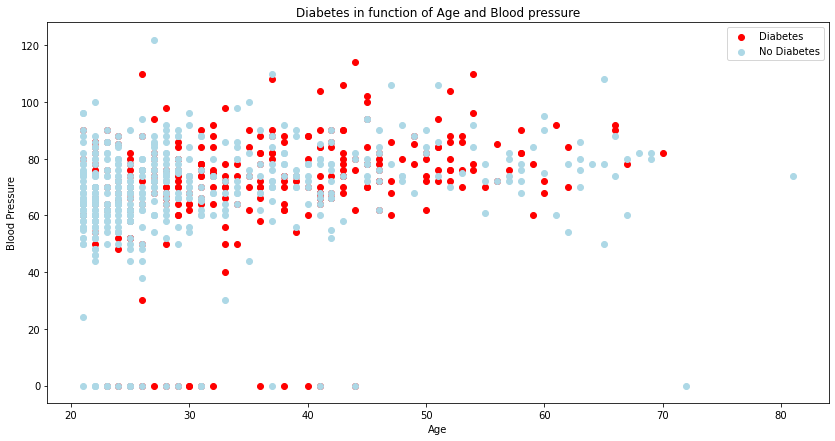

In [11]:
#find out Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(14,7))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");
# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");
# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

<AxesSubplot:xlabel='Glucose', ylabel='count'>

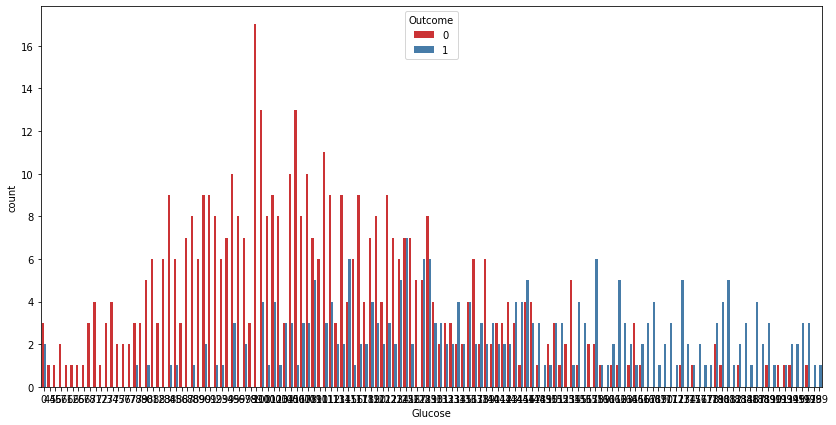

In [12]:
plt.figure(figsize=(14,7))
sns.countplot(x='Glucose',hue='Outcome', data=data, palette='Set1')

# Treatment of Missing Values

In [13]:
attributes = data.drop("Outcome",axis=1).columns
attributes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
# replacing missing value with nan value
nan_replacement_att=["Glucose",  "BloodPressure","SkinThickness","Insulin","Age","BMI"]
data[nan_replacement_att]=data[nan_replacement_att].replace(0,np.nan)

In [15]:
print(data.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [16]:
for feature in nan_replacement_att:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
Insulin 0.487  % missing values
Age 0.0  % missing values
BMI 0.0143  % missing values


**To fill these Nan values the data distribution needs to be understood**

# Checking the distribution of the data

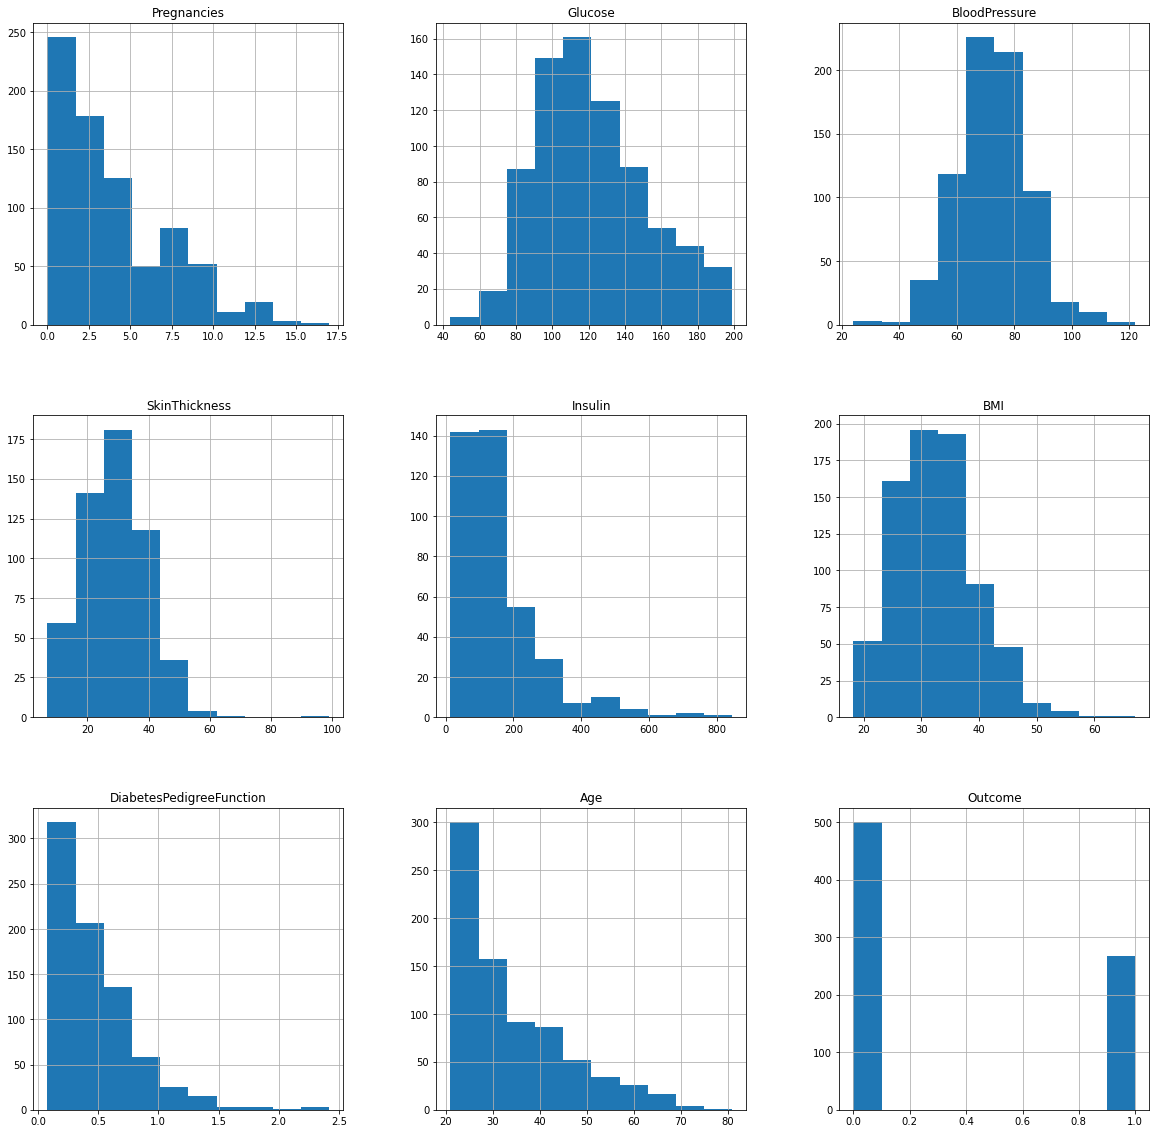

In [17]:
# Histogram of uncleaned data
fig = data.hist(figsize = (20,20))

**replacing nan value with median of that attribute grouped by outcome**

In [18]:
# calculation of median for each attribute for both possible outcome  
def median_target(attribute):
    """
    This function replaces the Nan of given attribute with 
    median when grouped by Outcome into the global variable 
    data("dataframe")
    
    input : attribute 
    output : column of that attibute is modified 
    return : none
    """
    # assigning non null value to temp 
    temp = data[data[attribute].notnull()]
    # calculate mean for a attribute with either 0 or 1 outcome 
    temp = temp[[attribute, 'Outcome']].groupby(['Outcome'])[[attribute]].median().reset_index()
    mean_op_0=temp[attribute][0]
    mean_op_1=temp[attribute][1]
    # assigning mean to null values 
    data.loc[(data['Outcome'] == 0 ) & (data[attribute].isnull()), attribute] = mean_op_0 
    data.loc[(data['Outcome'] == 1 ) & (data[attribute].isnull()), attribute] = mean_op_1
    

def median_target_all():
    # calling meadian_target for each attribute
    for attribute in attributes:
            median_target(attribute) 

In [19]:
median_target_all()  # median_target_all replaces nan value with median of that attribute grouped by outcome 

values of columns like 'glucose', 'bloodpressure' cannot be accepted as zeroes because it will affect the outcome, we can replace such values with the mean of respective columns.


In [20]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Plotting after Nan removal**

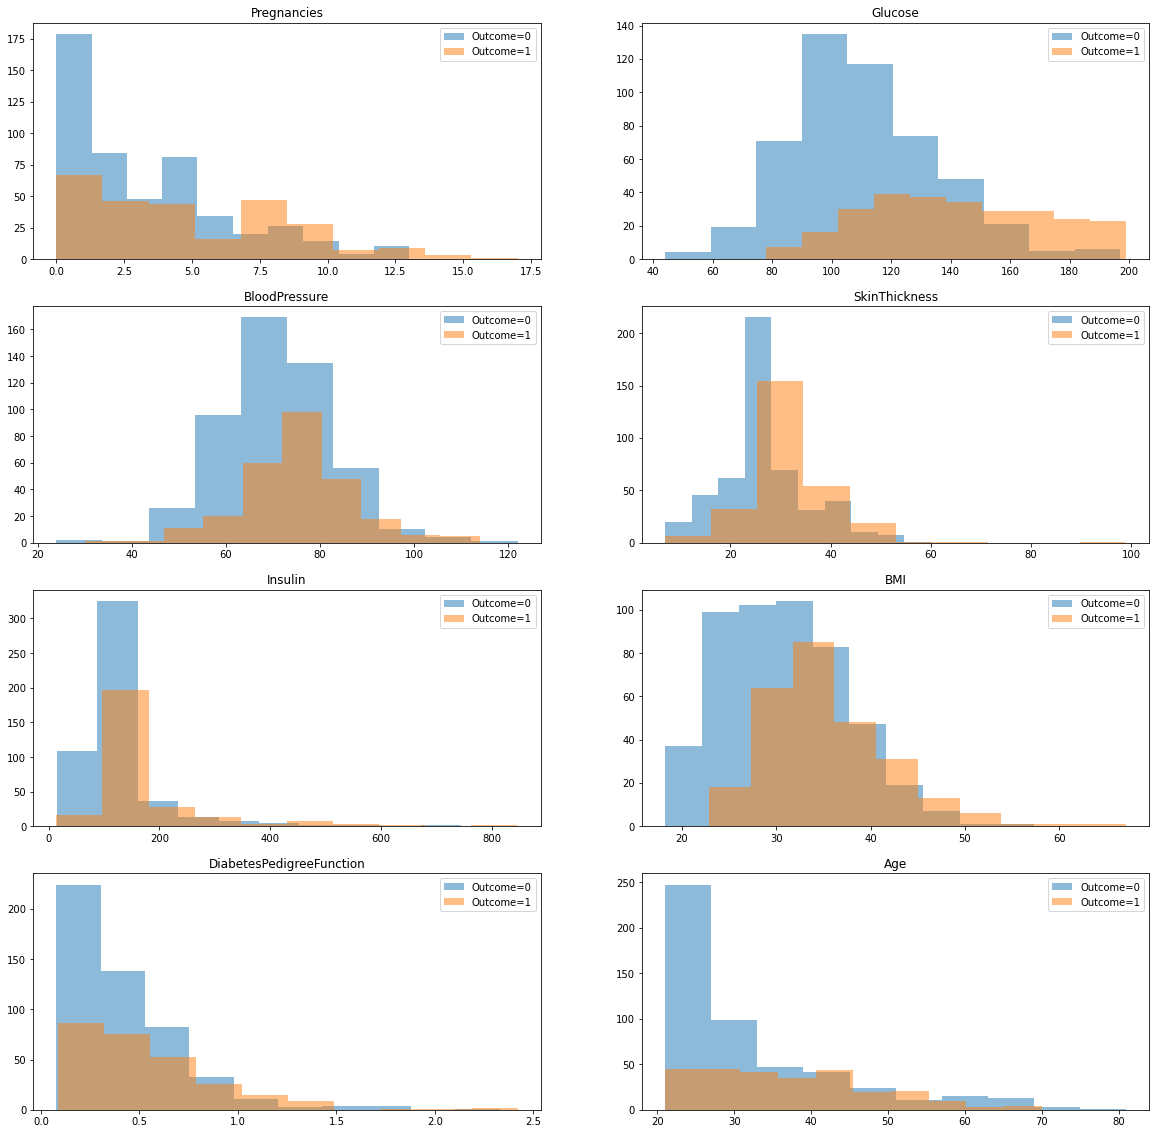

In [21]:
fig = plt.figure(figsize=(20,20))
fig.tight_layout(pad=3.0)
nrow,ncol,index=4,2,1    
for attribute in attributes:
    plt.subplot(nrow, ncol, index)
    plt.title(attribute)
    plt.hist(data[attribute][data.Outcome==0],alpha=0.5,label="Outcome=0")
    plt.hist(data[attribute][data.Outcome==1],alpha=0.5,label="Outcome=1")
    plt.legend(loc="best")
    index+=1
plt.show()

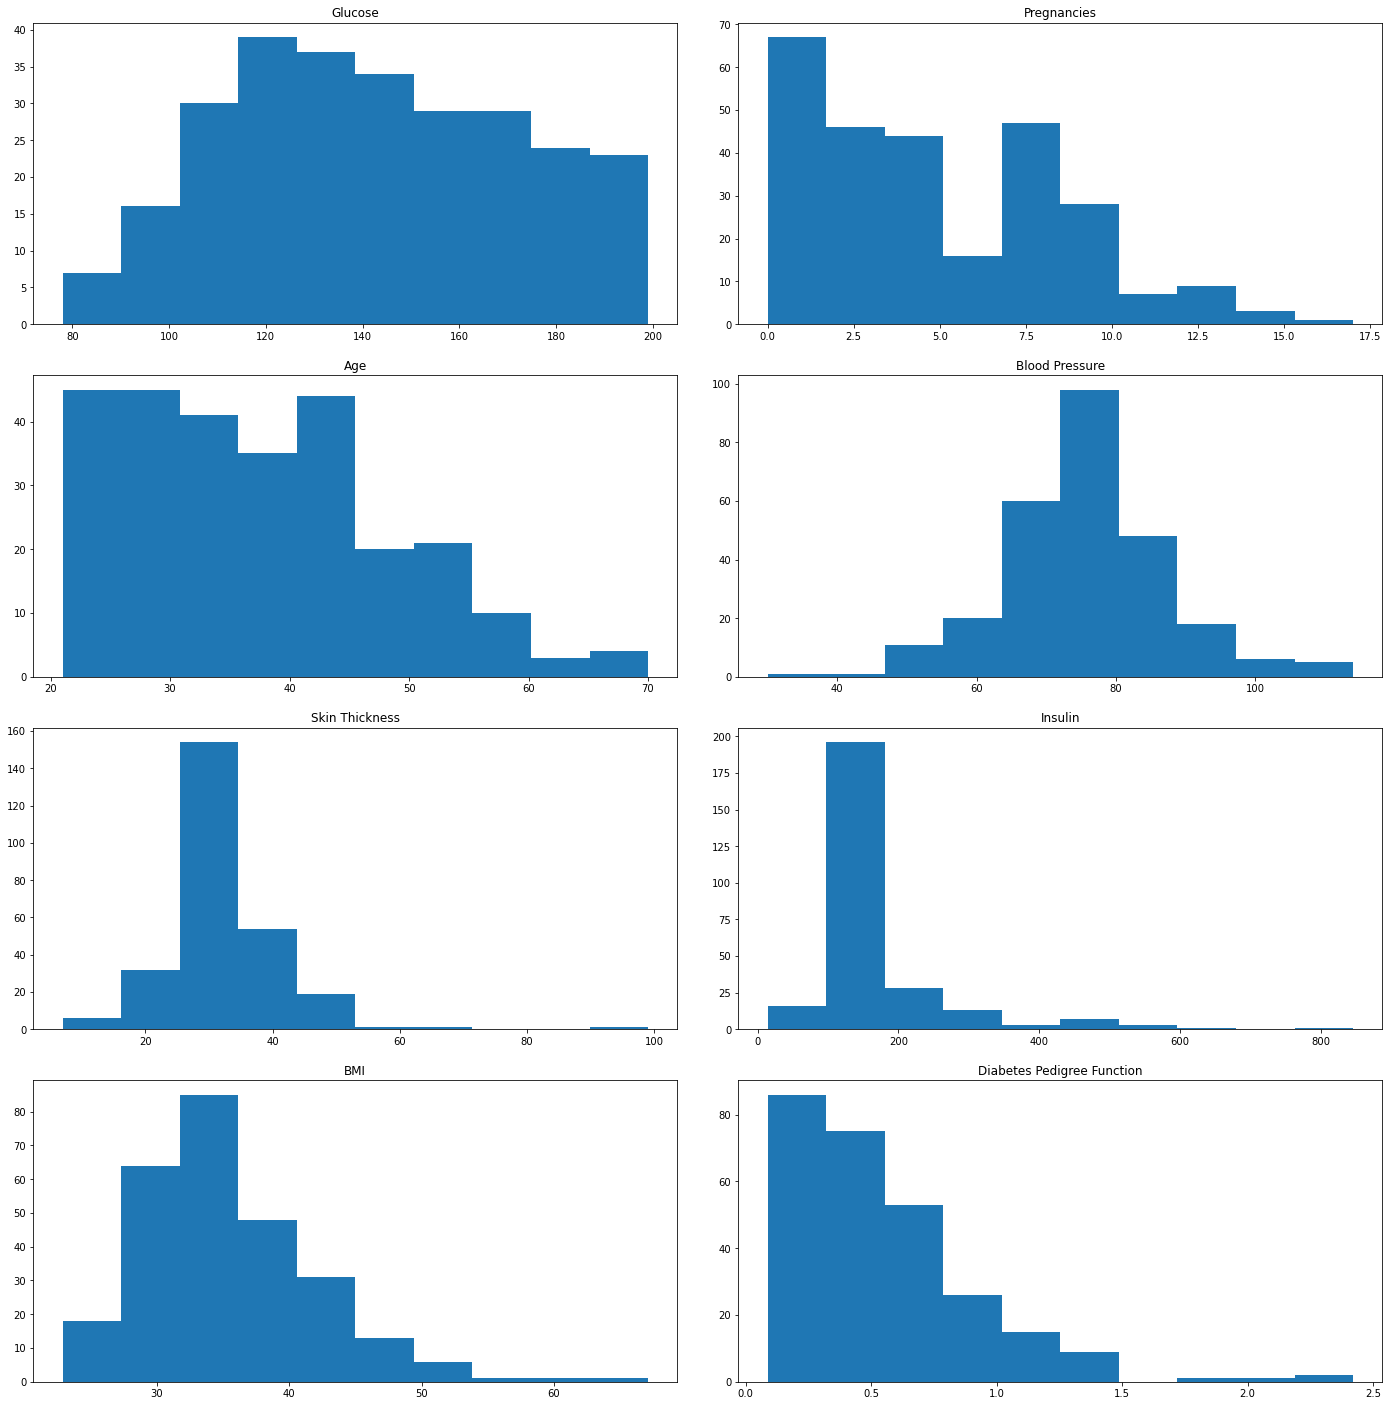

In [22]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

([<matplotlib.patches.Wedge at 0x1b016ef9dc0>,
 [Text(1.0051884653130878, 1.9569353972989298, 'Diabetic'),
  Text(-1.0051882820915679, -1.9569354914114576, 'Healthy')],
 [Text(0.5482846174435024, 1.067419307617598, '34.9%'),
  Text(-0.5482845175044915, -1.067419358951704, '65.1%')])

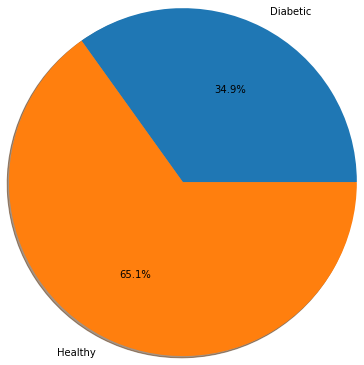

In [23]:
# proportion of diabetes patients and healthy person
list_diabetes=[268,500]
list_labels=['Diabetic','Healthy']
plt.axis('equal')
plt.pie(list_diabetes,labels=list_labels,radius=2,autopct="%0.1f%%",shadow=True)

**The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients so which means that more number of people whose observations are taken do not have diabetes.**

<AxesSubplot:xlabel='BMI', ylabel='Density'>

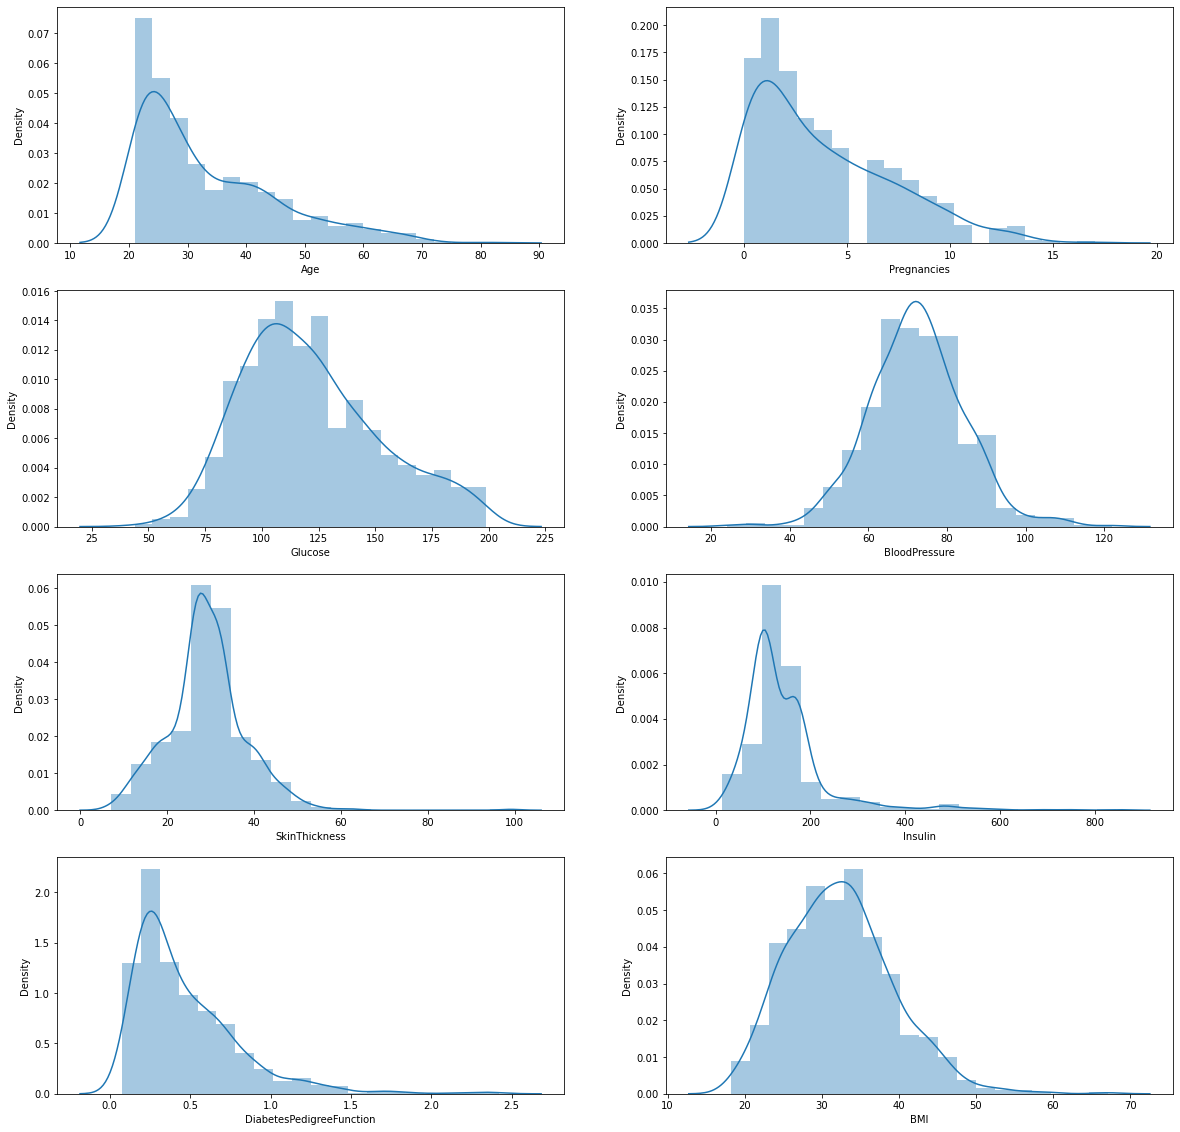

In [24]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1]) 

**Observation**  
Blood pressure, Glucose, Skin Thickness and BMI are uniformly distributed.
Diabetes Pedigree Function, Pregnancies, Insuline and Age are positively (right) skewed.
Blood Pressure, Skin Thickness, and Insulin have zero values which can be regarded as outliers.

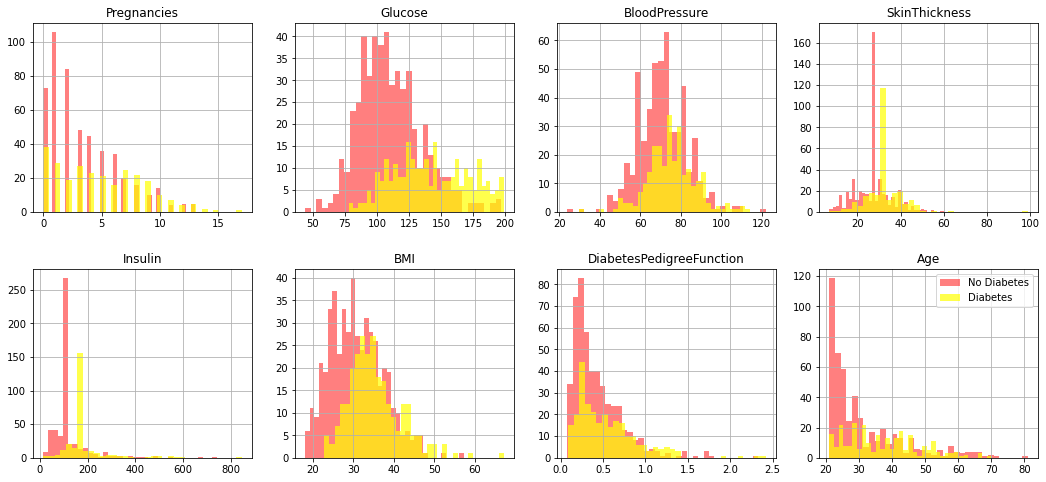

In [25]:
# To analyse feature-outcome distribution in visualisation
features = attributes

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    data[data.Outcome==0][feature].hist(bins=35, color='red', alpha=0.5, ax=ax[row, col]).set_title(feature)
    data[data.Outcome==1][feature].hist(bins=35, color='yellow', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

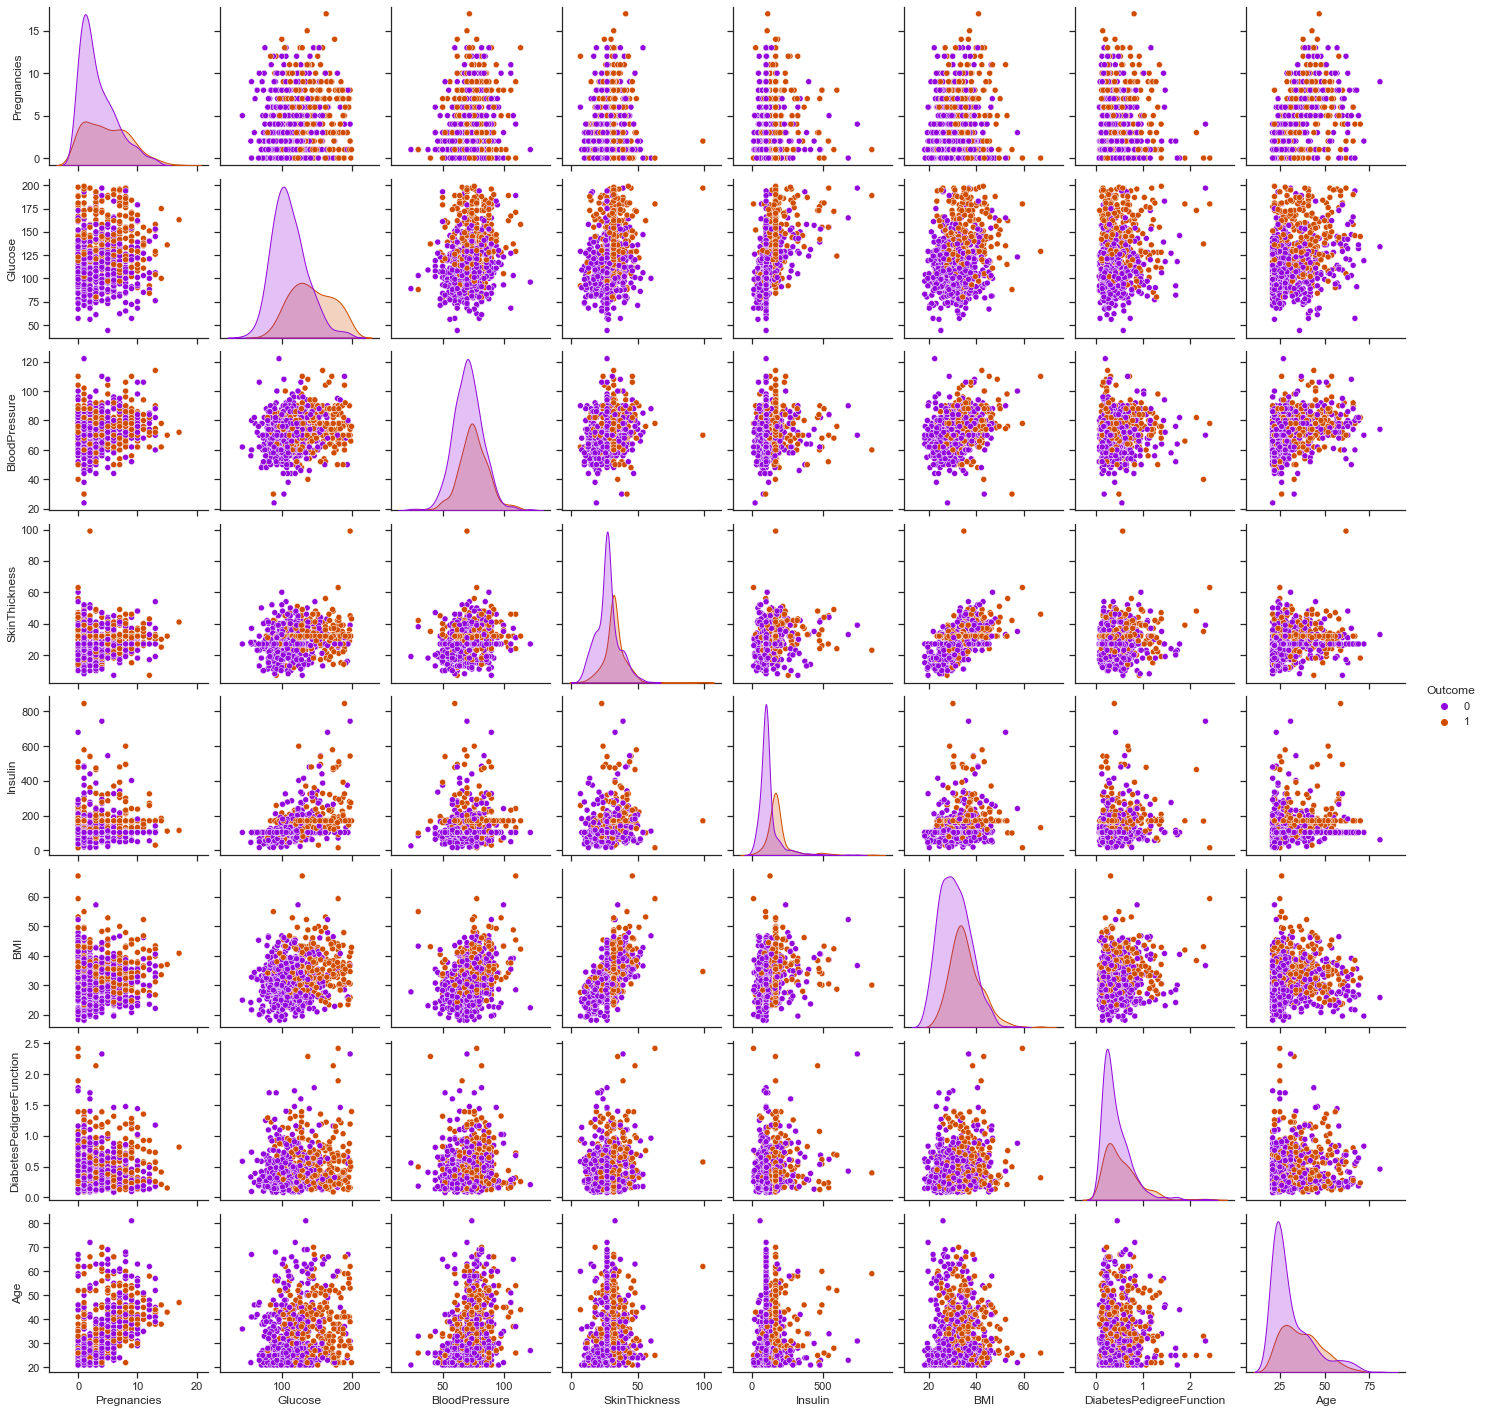

In [26]:
# Pair plot for clean data
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

**Inference from Pair Plots**
From scatter plots, to me only BMI & SkinThickness and Pregnancies & Age seem to have positive linear relationships. Another likely suspect is Glucose and Insulin.  
There are no non-linear relationships   
Lets check it out with Pearson Correlation and plot heat maps  

# Normality Test

A lot of statistical tests (e.g. t-test) require that our data are normally distributed and therefore we should always check if this assumption is violated.  
None of the variables are normal. (P>0.05) May be subsets are normal

In [27]:
## importing stats module from scipy
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(data.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(data.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(data.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(data.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(data.Insulin).pvalue
BMIPVAL=stats.normaltest(data.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(data.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(data.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 3.9142916387836715e-18
Glucose P Value is 1.9478970466004615e-08
BloodPressure P Value is 3.218554854054177e-05
Skin Thickness P Value is 1.5526840621659362e-35
Insulin P Value is 1.8917019739668346e-116
BMI P Value is 9.125612135479457e-13
Diabetes Pedigree Function P Value is 1.2987697487612696e-70
Age P Value is 9.308980038236578e-27


# Treatment of Outliers

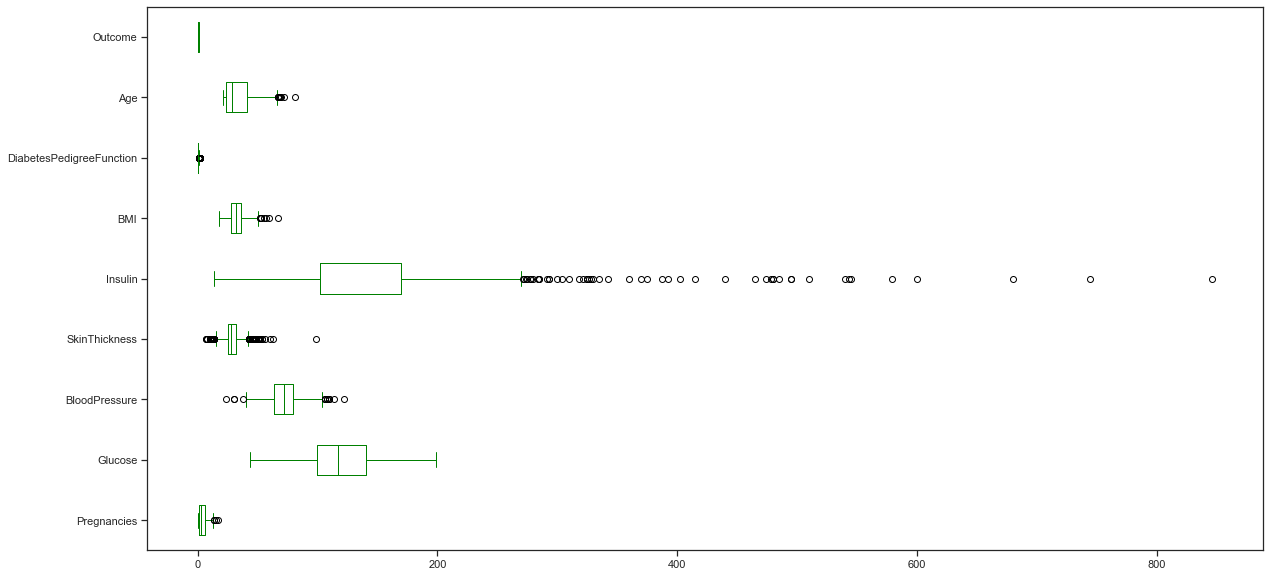

In [28]:
data.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

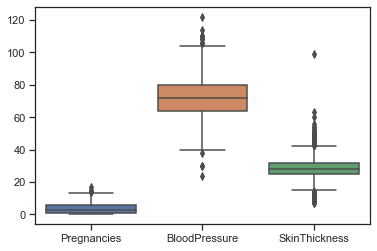

In [29]:
sns.boxplot(data=data.loc[:, ['Pregnancies','BloodPressure','SkinThickness']])
plt.show()

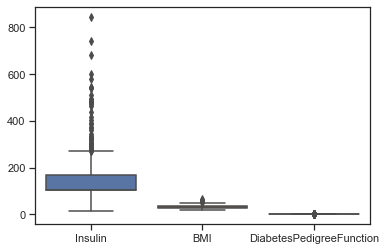

In [30]:
sns.boxplot(data=data.loc[:, ['Insulin','BMI','DiabetesPedigreeFunction']])
plt.show()

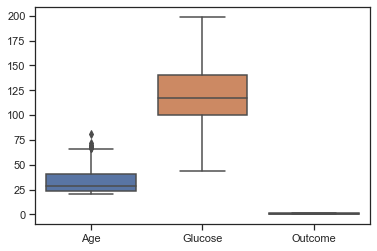

In [31]:
sns.boxplot(data=data.loc[:, ['Age','Glucose','Outcome']])
plt.show()

# Outliers Removal

## Pregnancies

In [32]:
q1 = data['Pregnancies'].quantile(0.25)
q3 = data['Pregnancies'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-6.5, 13.5)

In [33]:
data['Pregnancies']=np.where(data['Pregnancies'] > upper_limit,upper_limit,data['Pregnancies']) 
# upper limit

## Blood Pressure

In [34]:
q1 = data['BloodPressure'].quantile(0.25)
q3 = data['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(40.0, 104.0)

In [35]:
data['BloodPressure']=np.where(data['BloodPressure'] > upper_limit,upper_limit,data['BloodPressure'])
data['BloodPressure']=np.where(data['BloodPressure'] < Lower_limit,Lower_limit,data['BloodPressure'])

## SkinThickness

In [36]:
q1 = data['SkinThickness'].quantile(0.25)
q3 = data['SkinThickness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(14.5, 42.5)

In [37]:
data['SkinThickness']=np.where(data['SkinThickness'] > upper_limit,upper_limit,data['SkinThickness'])
data['SkinThickness']=np.where(data['SkinThickness'] < Lower_limit,Lower_limit,data['SkinThickness'])

## Insulin

In [38]:
q1 = data['Insulin'].quantile(0.25)
q3 = data['Insulin'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(2.0, 270.0)

In [39]:
data['Insulin']=np.where(data['Insulin'] > upper_limit,upper_limit,data['Insulin'])
data['Insulin']=np.where(data['Insulin'] < Lower_limit,Lower_limit,data['Insulin'])

## BMI

In [40]:
q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(13.849999999999998, 50.25)

In [41]:
data['BMI']=np.where(data['BMI'] > upper_limit,upper_limit,data['BMI'])

## DiabetesPedigreeFunction

In [42]:
q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-0.32999999999999996, 1.2)

In [43]:
data['DiabetesPedigreeFunction']=np.where(data['DiabetesPedigreeFunction'] > upper_limit,upper_limit,data['DiabetesPedigreeFunction'])

## Age

In [44]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-1.5, 66.5)

In [45]:
data['Age']=np.where(data['Age'] > upper_limit,upper_limit,data['Age'])

# After Outliers Removal

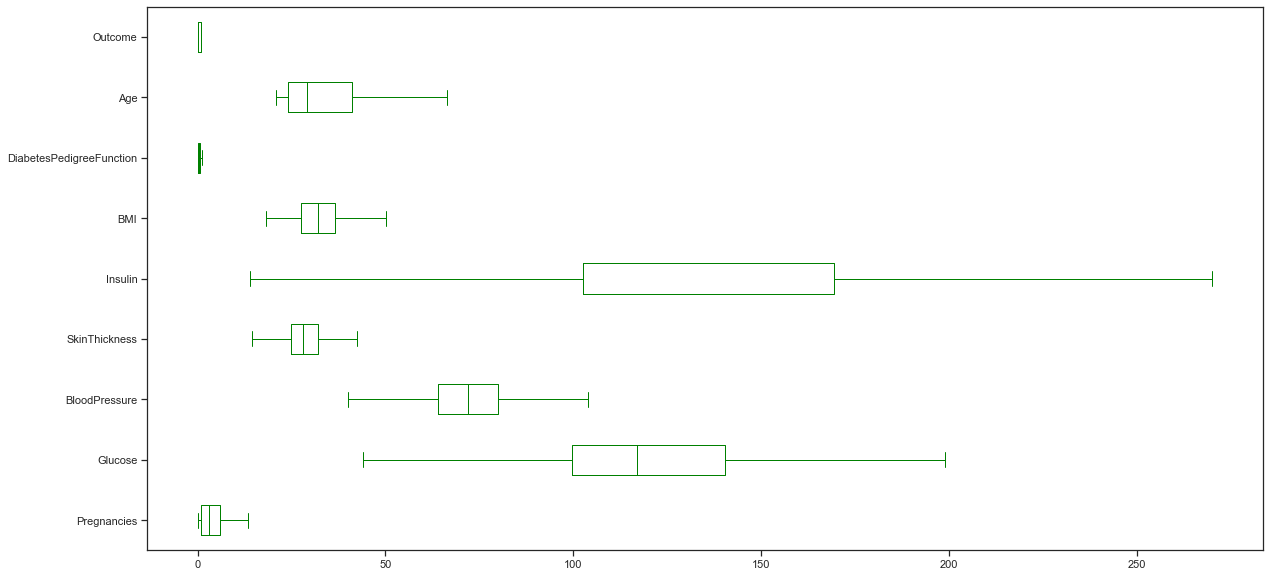

In [46]:
data.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

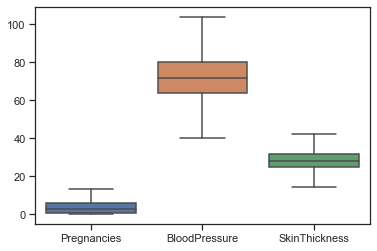

In [47]:
sns.boxplot(data=data.loc[:, ['Pregnancies','BloodPressure','SkinThickness']])
plt.show()

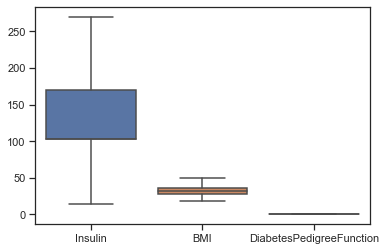

In [48]:
sns.boxplot(data=data.loc[:, ['Insulin','BMI','DiabetesPedigreeFunction']])
plt.show()

# Explorning data to know relation before processing

**Correlation Matrix**  

In [49]:
#Pearson Correlation Cofficient
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128816,0.211458,0.118445,0.113873,0.029570,-0.017398,0.549695,0.220392
Glucose,0.128816,1.000000,0.226614,0.224302,0.543188,0.238881,0.119713,0.270939,0.495990
BloodPressure,0.211458,0.226614,1.000000,0.212649,0.114953,0.291934,0.013425,0.333221,0.178008
SkinThickness,0.118445,0.224302,0.212649,1.000000,0.271925,0.585903,0.080226,0.129350,0.313945
Insulin,0.113873,0.543188,0.114953,0.271925,1.000000,0.299205,0.152478,0.166706,0.500678
BMI,0.029570,0.238881,0.291934,0.585903,0.299205,1.000000,0.138271,0.038119,0.316460
DiabetesPedigreeFunction,-0.017398,0.119713,0.013425,0.080226,0.152478,0.138271,1.000000,0.047289,0.184969
Age,0.549695,0.270939,0.333221,0.129350,0.166706,0.038119,0.047289,1.000000,0.242702
Outcome,0.220392,0.495990,0.178008,0.313945,0.500678,0.316460,0.184969,0.242702,1.000000


**It is clear from the above co-relation result that glucose it the most important feature**  

In [50]:
mask = np.zeros_like(data.corr())
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**Heatmap for the data**  

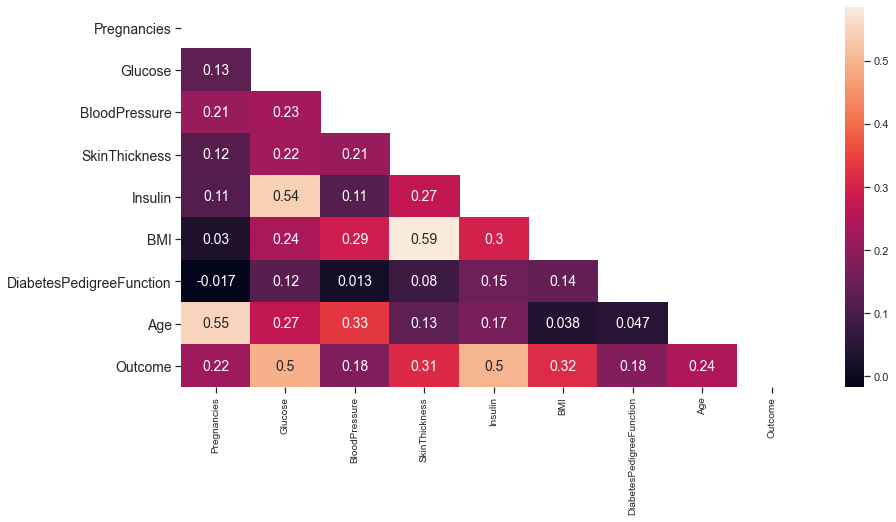

In [51]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),mask=mask, annot=True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show()

The heatmap indicates that the brighter the colors the higher the correlation and vice versa.

We can see that glucose is highly correlated to the dependent varaiable, which invariables means that the above medical facts is shown to be true in the given data.

Also, Insulin is the next correlated independent variable in the given data, but obviously does not correlate with outcome which medically is true because Insulin levels are used to predict the type of diabetes.

Based on these facts, the following conclusion is made:

That Glucose is the major predictor of diabetes Insulin is the major indicator of the type of daibetes

For the above reasons, only the glucose and insulin will be used to predict diabtes and type of diabetes.


# Splitting the Data

**Scaling the data**  
It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.  

**Train Test Split**  
To give a model a fair assessment, we’d like to know how well our data would perform on data it hasn’t seen yet.
In action, our model will be making predictions on data we don’t know the answer to, so we'd like to evaluate how well our model does on new data, not just the data it's already seen. To simulate making predictions on new unseen data, we can break our dataset into a training set and a test set. The training set is used for building the models. The test set is used for evaluating the models. We split our data before building the model, thus the model has no knowledge of the test set and we'll be giving it a fair assessment.  

**Cross Validation**  
When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

**About Stratify**
Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [78]:
# Dividing data into train and test dataset

#Feature scaling
#standardization

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=attributes)

y = data.Outcome

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

X.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.864625,-0.030829,0.814337,0.626896,0.184034,0.588927,1.445691
1,-0.848970,-1.204727,-0.543685,0.020080,-0.526560,-0.865690,-0.378101,-0.189304
2,1.245598,2.014265,-0.714637,0.417209,0.626896,-1.360560,0.746595,-0.103252
3,-0.848970,-1.073339,-0.543685,-0.774176,-0.672894,-0.640749,-1.022787,-1.049828
4,-1.148194,0.503310,-2.766060,0.814337,0.601072,1.608659,2.596563,-0.017199
5,0.347926,-0.186474,0.140123,-0.244672,-0.526560,-1.015651,-0.903661,-0.275356
6,-0.250522,-1.434655,-1.911300,0.417209,-0.776188,-0.205864,-0.738985,-0.619566
7,1.844045,-0.219321,-0.201781,-0.244672,-0.526560,0.438967,-1.138410,-0.361409
8,-0.549746,2.474120,-0.201781,1.807157,2.357079,-0.280844,-1.054321,1.703848
9,1.245598,0.109147,2.020594,0.417209,0.626896,0.289006,-0.795045,1.789900


In [79]:
import math
math.sqrt(len(y_test))

16.0

In [80]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i, p=2, metric='euclidean')
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [81]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [82]:
# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.375 % and k = [13]


In [83]:
from sklearn.metrics import accuracy_score
for K in range(13):
    K_value = K+1
    knn2 = KNeighborsClassifier(n_neighbors = K_value, p=2, metric='euclidean')
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:", K_value)

Accuracy is  82.8125 % for K-Value: 1
Accuracy is  79.6875 % for K-Value: 2
Accuracy is  82.8125 % for K-Value: 3
Accuracy is  83.59375 % for K-Value: 4
Accuracy is  83.59375 % for K-Value: 5
Accuracy is  83.203125 % for K-Value: 6
Accuracy is  82.8125 % for K-Value: 7
Accuracy is  82.421875 % for K-Value: 8
Accuracy is  83.59375 % for K-Value: 9
Accuracy is  81.25 % for K-Value: 10
Accuracy is  82.421875 % for K-Value: 11
Accuracy is  82.03125 % for K-Value: 12
Accuracy is  84.375 % for K-Value: 13


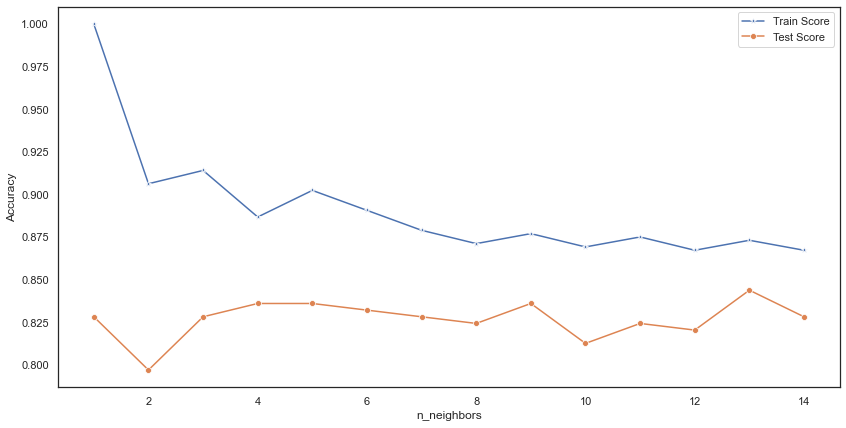

In [84]:
plt.figure(figsize=(14,7))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 13 neighbors.

**The best result is captured at k = 13 hence 13 is used for the final model**

In [85]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13, p=2, metric='euclidean')

knn.fit(X_train,y_train)
#print(knn.score(X_test,y_test))
print('Accuracy of K-NN classifier on training set at k=13: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set at k=13: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set at k=13: 0.87
Accuracy of K-NN classifier on test set at k=13: 0.84


[0.828125, 0.796875, 0.828125, 0.8359375, 0.8359375, 0.83203125, 0.828125, 0.82421875, 0.8359375, 0.8125, 0.82421875, 0.8203125, 0.84375, 0.828125, 0.83984375, 0.828125, 0.83984375, 0.82421875, 0.83203125, 0.8359375, 0.83984375, 0.83984375, 0.83984375, 0.83203125, 0.8359375, 0.83203125, 0.83203125, 0.828125, 0.828125, 0.82421875, 0.8203125]

 Average Accuracy: 0.8298891129032258


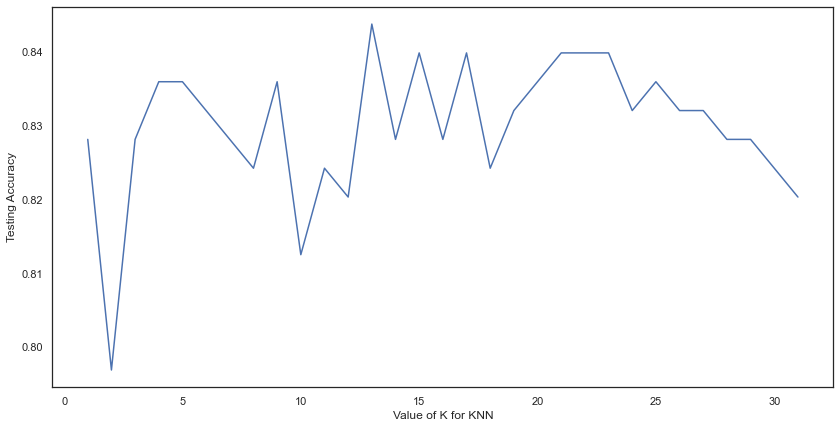

In [86]:
# try K=1 through K=31 and record testing accuracy
k_range = range(1, 32)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 32
# We append the scores in the dictionary
for i in k_range:
    knn3 = KNeighborsClassifier(n_neighbors=i)
    knn3.fit(X_train, y_train)
    y_pred = knn3.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

print ("\n Average Accuracy:",sum(scores)/len(scores))

plt.figure(figsize=(14,7))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

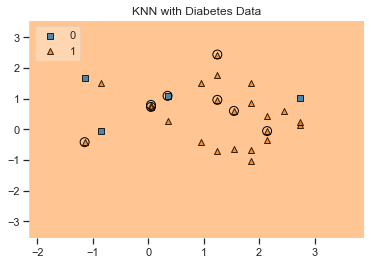

In [87]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('x')
#plt.ylabel('y')
plt.title('KNN with Diabetes Data')
plt.show()

In [88]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     58.35
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           5.10e-74
Time:                        23:31:34   Log-Likelihood:                -336.59
No. Observations:                 768   AIC:                             691.2
Df Residuals:                     759   BIC:                             733.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**This is the summary of model with all the features included. The value of R squared indicates 32.5% variance is explained by this model. The P value for the feature Skin, insulin, age is more than 0.05 which is enough to accept the null hypothesis for these features. We need to make this model more accurate by selecting appropriate features.**

# Model Performance Analysis

Confusion Matrix The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [89]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,149,18,167
1,22,67,89
All,171,85,256


Text(0.5, 12.5, 'Predicted label')

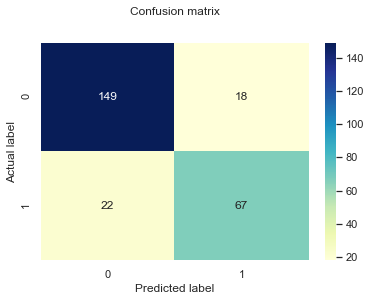

In [90]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.84375


In [92]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       167
           1       0.79      0.75      0.77        89

    accuracy                           0.84       256
   macro avg       0.83      0.82      0.83       256
weighted avg       0.84      0.84      0.84       256



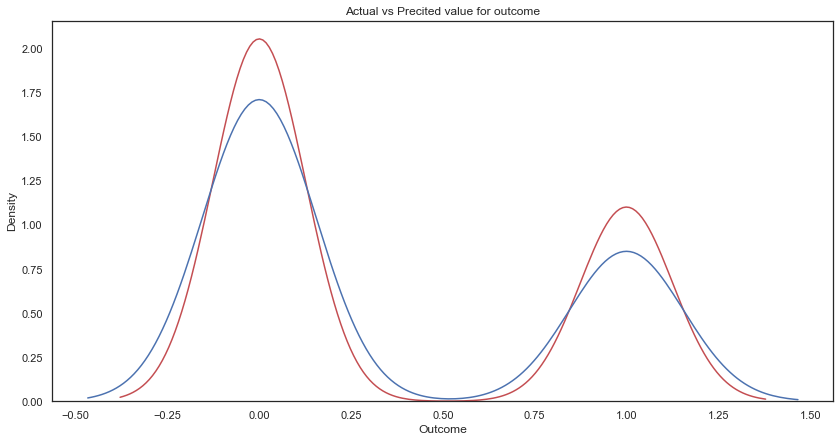

In [93]:
plt.figure(figsize=(14, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

# ROC - AUC

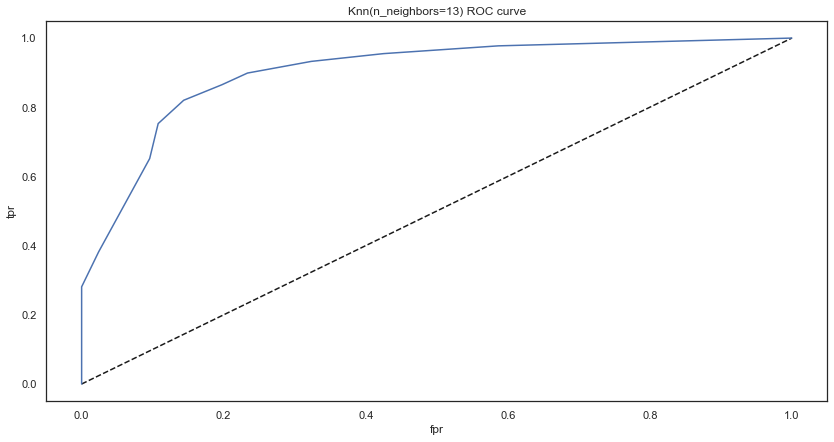

In [94]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(14,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=13) ROC curve')
plt.show()

In [95]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.901937697638431

# COMPARISION WITH OTHER ALGORITHMS AND PARAMETER TUNNING

# Function definations

In [76]:
def plot_roc(fpr,tpr,auc_model,name_of_algo):
    """
    This function pots the ROC curve with help of False positive rate
    and True positive rate and auc object
    
    input : false positive rate, ture positive rate,auc of model,name_of_algo
    
    output : ROC plot 
    
    return : None
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_model))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve of '+name_of_algo)
    plt.legend(loc='best')
    plt.show()

##############################################################################################################
        
def z_score(df):
    """
    Function for apply z score standardization
    
    Input: dataframe to be standardized
       
    output :standardized dataframe 
    """
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()     
    return df_std

##############################################################################################################

def plot_confusion_matrix(df_cm,name_of_algo):
    """
    Function for plot confusion matrix as heatmap with tittle name of algorith 
    
    Input : confusion matrix converted into dataframe, Name of algorithm  
    
    output : Plot heatmap of confusion matrix 
    
    return : None 
    """
    sns.heatmap(df_cm, annot=True,fmt="d")
    plt.title(name_of_algo)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()  

##############################################################################################################

def model_evalution(model, name_of_algo, X, y, score, final_Result):
    """
    Function calculate different performance using cross validate method 
    
    Input  : model = object of algorithm , string type name of algorithm , X,y 
             score = dictionary containing performance metrics , final_Result = empty Dict for storing result 
    return : final_result dictionary containg all performance result,
             df_cm a dataframe containing confusion matrix
    """
    model_score=cross_validate(model,X,y,cv=10,scoring=score)
    y_pred_cross = cross_val_predict(model,X,y,cv=10)
    conf_mat = confusion_matrix(y, y_pred_cross)
    df_cm = pd.DataFrame(conf_mat)
    sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1]) # TPR, REC,sensitivity = TP / (TP + FN)
    specificity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])# specificity = TN / (TN + FP)
    precision =conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,1])# PREC, PPV =TP / (TP + FP)
    f1_score= 2*sensitivity*precision/(precision+sensitivity) # 2 * PREC * REC / (PREC + REC)
    avg_auc="{:.3f} +- {:.3f}".format((model_score["test_roc_auc"].mean()*100),(model_score["test_roc_auc"].std()))
    avg_auc="{:.3f} +- {:.3f}".format((model_score["test_roc_auc"].mean()*100),(model_score["test_roc_auc"].std()))
    avg_accuracy="{:.3f} +- {:.3f}".format((model_score["test_accuracy"].mean()*100),(model_score["test_accuracy"].std()))
    final_Result["Specificity"].append(specificity)
    final_Result["Sensitivity/Recall"].append(sensitivity)
    final_Result["Precision"].append(precision)
    final_Result["F1 Score"].append(f1_score)
    final_Result["Accuracy"].append(avg_accuracy)
    final_Result["AUC(ROC)"].append(avg_auc)
    final_Result["Model"].append(name_of_algo)
    return final_Result, df_cm

###################################################################

def grid_search(model,parameter,score,name_model,X_train,y_train,cv=10):
    """
    Function for using grid search for hypper parameter tunning with default cv =10
    
    Input  : model = object of algorithm ,parameter(dict) = dictionary containing all parameter with iterable values
             score(str)= performance metric for which model is tunned ,name of model(str), X,y,CV
    
    output: Print dict of tunned parameter with name of model
    
    return : None
    
    """
    gridsearch = GridSearchCV(model, parameter,scoring=score, cv = cv, verbose = 2, 
                  n_jobs = -1)
    print(name_model)
    bestfit=gridsearch.fit(X_train,y_train)
    print(bestfit.best_params_)

# Principal Component Analysis(PCA) for Dimensionality Reduction

************************************************************************************************************************

[[0.40758425 0.7698644  0.01651937 0.20593598 1.00685129 0.50060457
  0.14126192 0.08122182]]



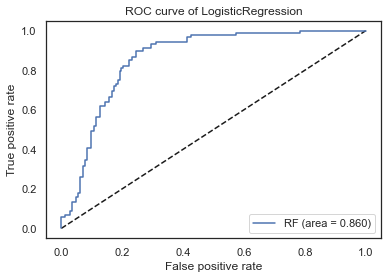

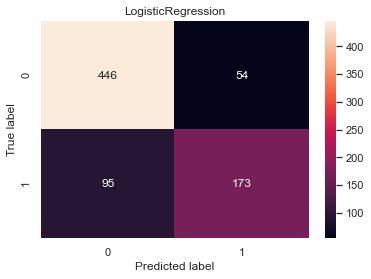

************************************************************************************************************************

null



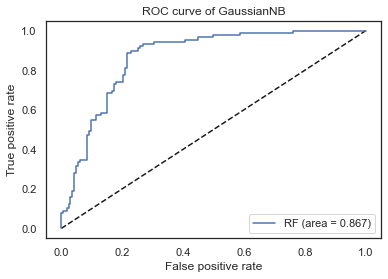

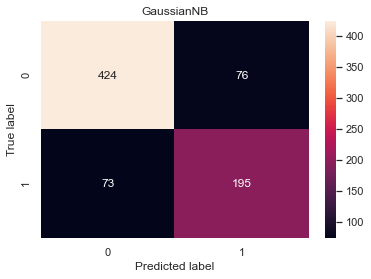

************************************************************************************************************************

null



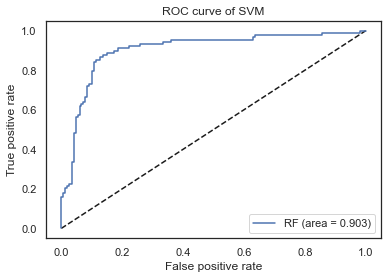

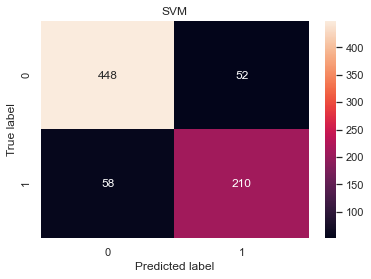

************************************************************************************************************************

null



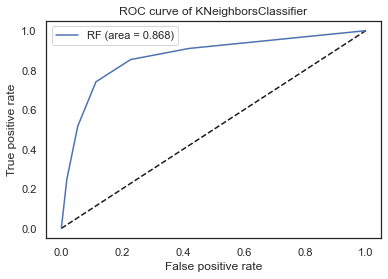

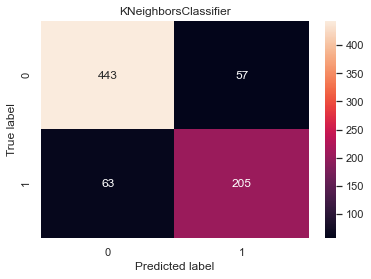

************************************************************************************************************************

[0.05249262 0.15857812 0.05382451 0.14306904 0.36109971 0.08500184
 0.07009028 0.07584388]



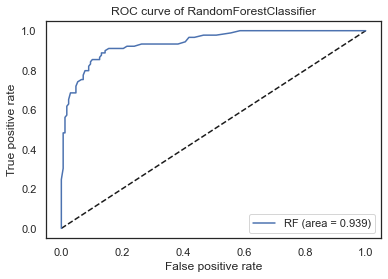

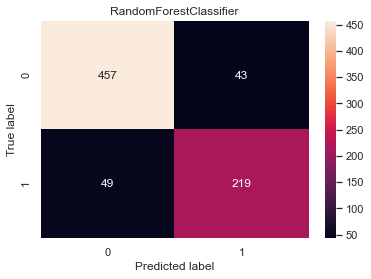

************************************************************************************************************************

[0.04 0.18 0.06 0.08 0.36 0.1  0.14 0.04]



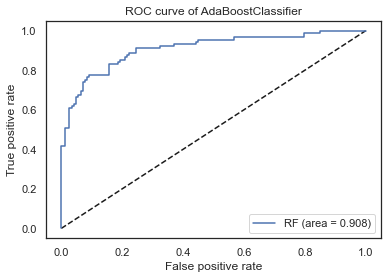

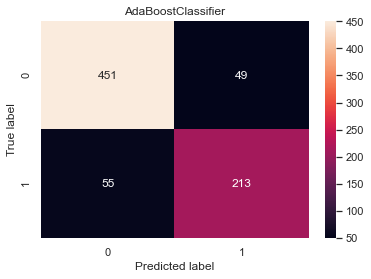

[23:04:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

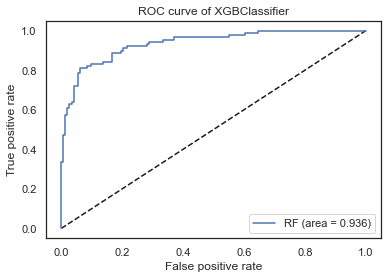

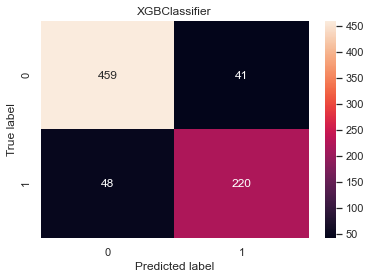

In [77]:
from collections import defaultdict
list_of_algo=[LogisticRegression(),GaussianNB(),SVC(probability=True),KNeighborsClassifier(),
              RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]

name_of_algo=["LogisticRegression","GaussianNB","SVM","KNeighborsClassifier",
              "RandomForestClassifier","AdaBoostClassifier","XGBClassifier"]


score = {"accuracy": "accuracy",
         "prec": "precision","recall" : "recall",
         "f1" : "f1","roc_auc" : "roc_auc"}
final_Result= defaultdict(list)
for i,algorithm in enumerate(list_of_algo):
    model=algorithm
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    ## Evalution of model 
    final_Result,df_cm = model_evalution(model,name_of_algo[i],X,y,score,final_Result)
    
    # Roc  
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_model = auc(fpr, tpr)
    print("*"*120)
    print()
    try :
        print(model.coef_)
    except:
        try:
            print(model.feature_importances_)
        except :
            print("null")
    print()
    plot_roc(fpr,tpr,auc_model,name_of_algo[i])
    plot_confusion_matrix(df_cm,name_of_algo[i])
    """
    sns.heatmap(df_cm, annot=True,fmt="d")
    plt.title(name_of_algo[i])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    """

In [78]:
pd.DataFrame.from_dict(final_Result)

,Specificity,Sensitivity/Recall,Precision,F1 Score,Accuracy,AUC(ROC),Model
0,0.645522,0.892,0.720517,0.797140,80.602 +- 0.036,87.693 +- 0.027,LogisticRegression
1,0.727612,0.848,0.684976,0.757819,80.600 +- 0.035,87.972 +- 0.028,GaussianNB
2,0.783582,0.896,0.680851,0.773748,85.673 +- 0.034,91.188 +- 0.023,SVM
3,0.764925,0.886,0.683642,0.771777,84.375 +- 0.031,89.179 +- 0.027,KNeighborsClassifier
4,0.817164,0.914,0.676036,0.777211,87.498 +- 0.034,94.469 +- 0.018,RandomForestClassifier
5,0.794776,0.902,0.679217,0.774914,86.456 +- 0.022,93.747 +- 0.014,AdaBoostClassifier
6,0.820896,0.918,0.675994,0.778626,88.421 +- 0.031,95.027 +- 0.011,XGBClassifier


Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 1.1150 - accuracy: 0.5879
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7248
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7296
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7606
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7606
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7834
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7752
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.8029
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.8029
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7883
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8795
Epoch 84/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8827
Epoch 85/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8762
Epoch 86/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8925
Epoch 87/200
77/77 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8681
Epoch 88/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.8844
Epoch 89/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.8893
Epoch 90/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8876
Epoch 91/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8795
Epoch 92/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8779
Epoch 93/200


77/77 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.8941
Epoch 165/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.8958
Epoch 166/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.8958
Epoch 167/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9055
Epoch 168/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8876
Epoch 169/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8860
Epoch 170/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9023
Epoch 171/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.8811
Epoch 172/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8941
Epoch 173/200
77/77 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.8941
Epoc

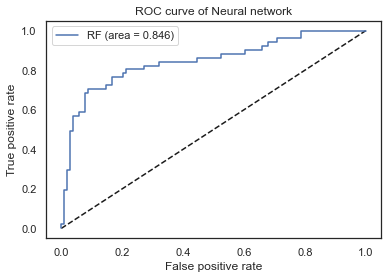

In [80]:
##Build a model(Neural model)
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_fit=model.fit(X_train, y_train, epochs=200, batch_size=8);

_, nn_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_nn = auc(fpr, tpr)
plot_roc(fpr,tpr,auc_nn,"Neural network")

# Model after parameter tunning

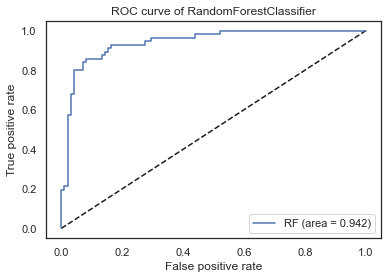

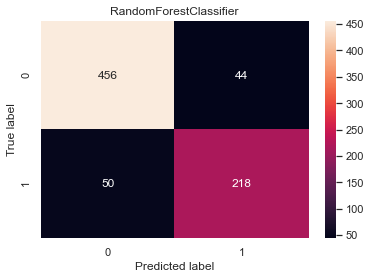

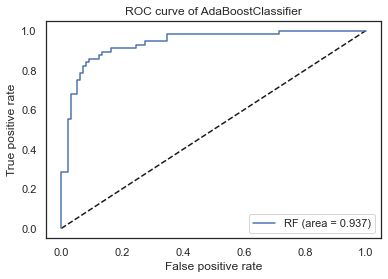

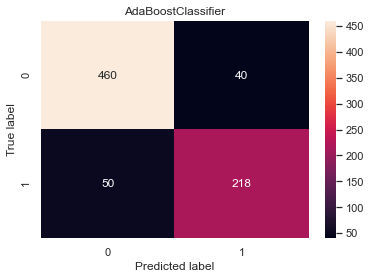

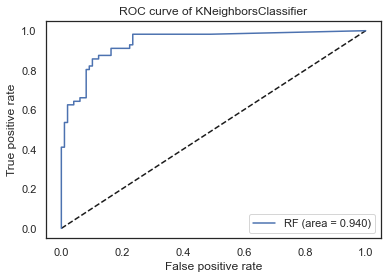

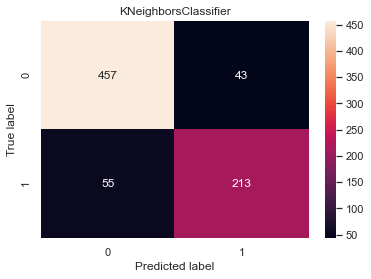

In [81]:
y = data["Outcome"]
X=data.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)
score = {"accuracy": "accuracy",
         "prec": "precision","recall" : "recall",
         "f1" : "f1","roc_auc" : "roc_auc"}

opt_alg_name=["RandomForestClassifier","AdaBoostClassifier",
                "KNeighborsClassifier"]

opt_algo =   [RandomForestClassifier(bootstrap = True, criterion = 'gini',max_depth = 11,
                        max_features= 'auto', min_samples_leaf = 3, min_samples_split = 5,
                        n_estimators = 100),
            AdaBoostClassifier(learning_rate = 0.1, n_estimators = 450),
            KNeighborsClassifier(leaf_size = 3, n_neighbors = 17, weights = 'distance')]
opt_final_Result= defaultdict(list)
for i,algorithm in enumerate(opt_algo):
    model=algorithm
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    ## Evalution of model 
    opt_final_Result,df_cm = model_evalution(model,opt_alg_name[i],X,y,score,opt_final_Result)
    
    # Roc  
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_model = auc(fpr, tpr)
    
    plot_roc(fpr,tpr,auc_model,opt_alg_name[i])
    plot_confusion_matrix(df_cm,opt_alg_name[i])

In [83]:
pd.DataFrame.from_dict(opt_final_Result)

,Specificity,Sensitivity/Recall,Precision,F1 Score,Accuracy,AUC(ROC),Model
0,0.813433,0.912,0.676558,0.776831,88.544 +- 0.037,94.751 +- 0.018,RandomForestClassifier
1,0.813433,0.920,0.678466,0.780985,88.279 +- 0.024,95.220 +- 0.018,AdaBoostClassifier
2,0.794776,0.914,0.682090,0.781197,87.233 +- 0.030,92.954 +- 0.025,KNeighborsClassifier


**KNN showed highier accuracy (87.233 %) after parameter tunning**

# Loading and Saving a model

In [87]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
583,8.0,100.0,76.0,27.0,102.5,38.7,0.190,42.0
53,8.0,176.0,90.0,34.0,270.0,33.7,0.467,58.0
609,1.0,111.0,62.0,14.5,182.0,24.0,0.138,23.0
691,13.0,158.0,104.0,32.0,169.5,42.3,0.257,44.0
465,0.0,124.0,56.0,14.5,105.0,21.8,0.452,21.0
...,...,...,...,...,...,...,...,...
167,4.0,120.0,68.0,27.0,102.5,29.6,0.709,34.0
27,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22.0
470,1.0,144.0,82.0,40.0,102.5,41.3,0.607,28.0
513,2.0,91.0,62.0,27.0,102.5,27.3,0.525,22.0


In [76]:
import pickle
model_opt=opt_algo[0]
# Save trained model to file
pickle.dump(model_opt, open("Diabetes.pkl", "wb"))
# pickle.dump(knn, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8311688311688312

In [81]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

8.0
100.0
76.0
27.0
102.5
38.7
0.190
42.0


In [83]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])
row_df

,0,1,2,3,4,5,6,7
0,8.0,100.0,76.0,27.0,102.5,38.7,0.190,42.0


In [84]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.040630952380952386


In [85]:
loaded_model.predict(row_df)[0]

0